In [1]:
# -*- coding: utf-8 -*-
"""3_data_visualization.ipynb - Visualization after all Data Engineering steps."""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  تحديد مسار Curated Zone
curated_zone_path = 'data_lake/curated_zone'

# 🪄 تعيين نمط seaborn لتحسين شكل المخططات
sns.set_style("whitegrid")


In [2]:
from google.colab import files

files.upload()

Saving avg_score_per_subject .csv to avg_score_per_subject .csv
Saving performance_by_city .csv to performance_by_city .csv


{'avg_score_per_subject .csv': b'subject_name,average_score\narabic,85.53\nenglish,85.97\nhistory,82.46\nmath,82.68\nscience,75.46\n',
 'performance_by_city .csv': b'city,average_attendance_rate,average_gpa,student_count\nalexandria,81.78,2.86,192\ncairo,81.49,2.93,197\ngiza,83.09,2.94,182\nluxor,82.78,2.92,225\nmansoura,81.05,2.88,204\n'}

In [5]:
import shutil
import os

curated_zone_path = 'data_lake/curated_zone'
os.makedirs(curated_zone_path, exist_ok=True)

# الملفات المتوقع رفعها
files_to_move = ['avg_score_per_subject .csv', 'performance_by_city .csv']

for file_name in files_to_move:
    if os.path.exists(file_name):
        shutil.move(file_name, os.path.join(curated_zone_path, file_name))
        print(f" تم نقل {file_name} إلى {curated_zone_path}")
    else:
        print(f" الملف {file_name} غير موجود. تأكد من رفعه.")


 تم نقل avg_score_per_subject .csv إلى data_lake/curated_zone
 تم نقل performance_by_city .csv إلى data_lake/curated_zone


In [7]:
import pandas as pd

df_subject = pd.read_csv(os.path.join(curated_zone_path, 'avg_score_per_subject .csv'))
df_city = pd.read_csv(os.path.join(curated_zone_path, 'performance_by_city .csv'))

print(" تم تحميل الملفات بنجاح")
print("عدد صفوف df_subject:", len(df_subject))
print("عدد صفوف df_city:", len(df_city))


 تم تحميل الملفات بنجاح
عدد صفوف df_subject: 5
عدد صفوف df_city: 5


/tmp/ipython-input-3710914380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject_name', y='average_score', data=df_subject, palette='viridis')


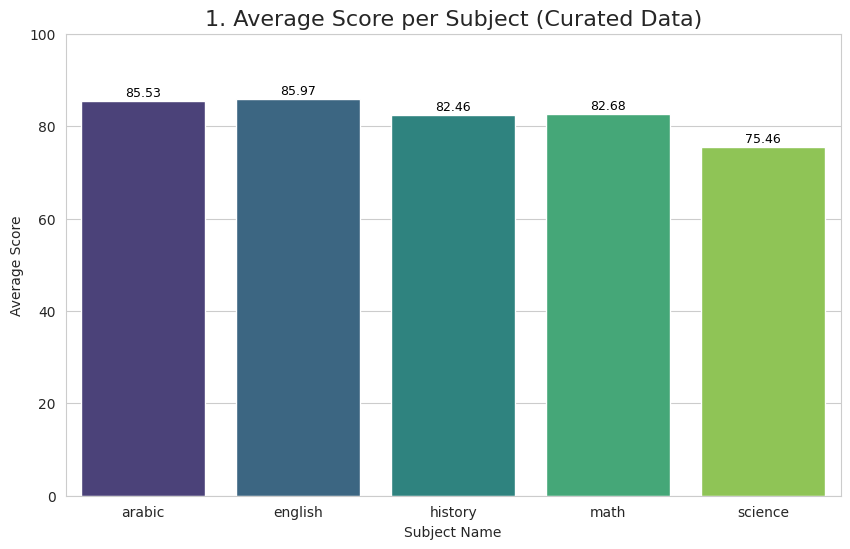

--------------------------------------------------


In [8]:

# 3. المخطط 1: متوسط الدرجات حسب المادة (Bar Plot)

plt.figure(figsize=(10, 6))
sns.barplot(x='subject_name', y='average_score', data=df_subject, palette='viridis')
plt.title('1. Average Score per Subject (Curated Data)', fontsize=16)
plt.xlabel('Subject Name')
plt.ylabel('Average Score')
plt.ylim(0, 100)

# عرض القيم فوق الأعمدة
for index, row in df_subject.iterrows():
    plt.text(index, row['average_score'] + 1, round(row['average_score'], 2),
             color='black', ha="center", fontsize=9)

plt.show()
print("-" * 50)


/tmp/ipython-input-1332790965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='student_count', data=df_city, palette='magma')


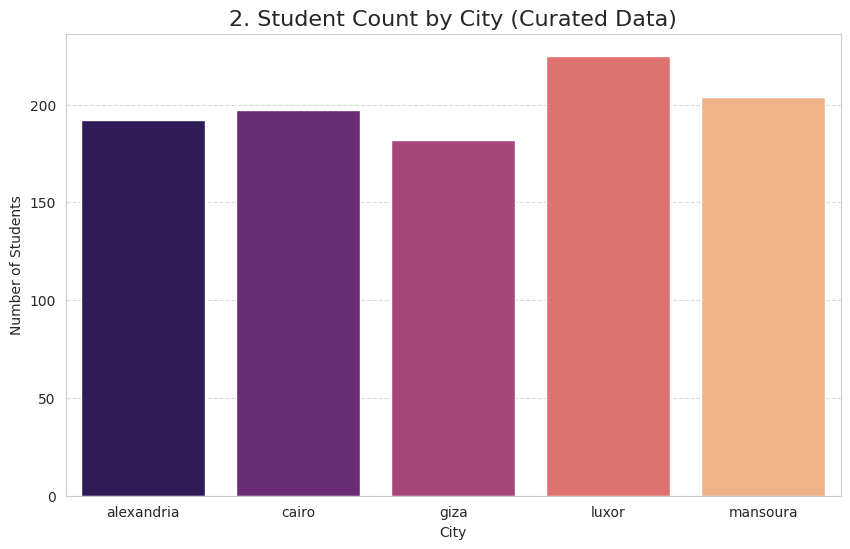

--------------------------------------------------


In [9]:
# 4. المخطط 2: عدد الطلاب حسب المدينة (Student Count)

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='student_count', data=df_city, palette='magma')
plt.title('2. Student Count by City (Curated Data)', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("-" * 50)


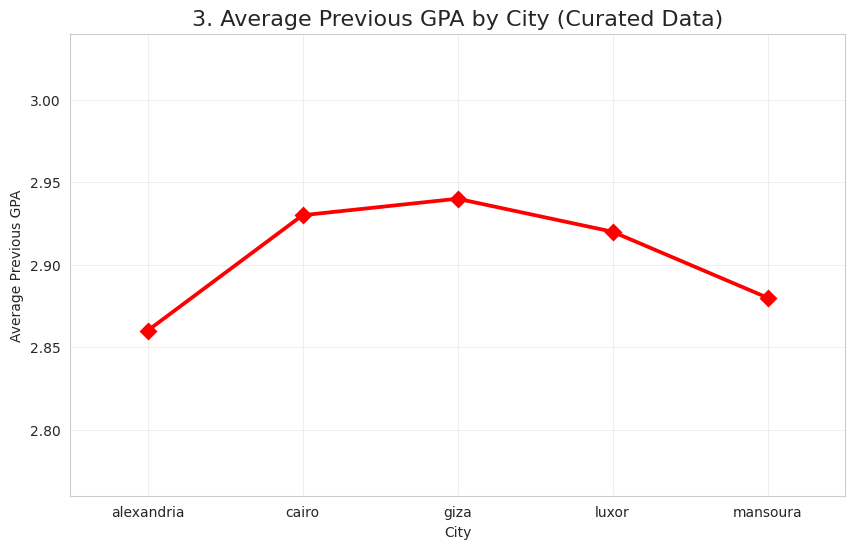


--- Visualization Complete  ---


In [10]:
# . المخطط 3: متوسط GPA حسب المدينة (Analysis of Prior Performance)

plt.figure(figsize=(10, 6))
sns.pointplot(x='city', y='average_gpa', data=df_city,
              color='red', markers='D', linestyles='-', capsize=.2)
plt.title('3. Average Previous GPA by City (Curated Data)', fontsize=16)
plt.xlabel('City')
plt.ylabel('Average Previous GPA')
plt.ylim(min(df_city['average_gpa']) - 0.1, max(df_city['average_gpa']) + 0.1)
plt.grid(axis='both', linestyle='-', alpha=0.3)
plt.show()

print("\n--- Visualization Complete  ---")
